In [2]:
%pip install -r requirements.txt


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# leer datos de un csv y convertirlos en un dataset
pathP = '../cluster/tiemposParalelos.csv'
dataP = pd.read_csv(pathP)
pathS = '../cluster/tiemposSecuenciales.csv'
dataS = pd.read_csv(pathS)

In [3]:
# creamos un nuevo dataframe con los datos promediados si las primeras 5 columnas son iguales
df_promedioP = dataP.groupby(['nodos', 'fil_a', 'col_a', 'fil_b', 'col_b']).mean().reset_index()
df_promedioS = dataS.groupby(['fil_a', 'col_a', 'fil_b', 'col_b']).mean().reset_index()

#a cada valor de las ultimas dos columnas del dataset df_promedioS lo dividimos por mil
df_promedioS['tiempo_creation'] = df_promedioS['tiempo_creation']/1000
df_promedioS['tiempo_calc'] = df_promedioS['tiempo_calc']/1000

In [36]:
df_promedioP

,nodos,fil_a,col_a,fil_b,col_b,tiempo_creation,tiempo_comm,tiempo_calc
0,2,200,300,300,400,0.011910,0.018159,0.429783
1,2,400,400,400,400,0.021699,0.033931,1.207526
2,2,500,500,500,500,0.036244,0.052034,2.450262
3,2,1000,500,500,500,0.056691,0.080424,3.334868
4,2,1000,1000,1000,1000,0.157449,0.178607,22.959179
5,2,2000,2000,2000,2000,0.584335,0.718632,196.325476
6,2,2000,3000,3000,4000,1.308762,1.652960,590.076281
7,2,3000,3000,3000,3000,1.257218,1.576753,664.808293
8,2,4000,4000,4000,4000,2.472745,2.859712,1588.560525
9,4,200,300,300,400,0.012133,0.055913,0.207491


In [19]:
pathNodo0 = '../cluster/tiemposNodo0.csv'
dataNodo0 = pd.read_csv(pathNodo0,header=None)
pathNodo1 = '../cluster/tiemposNodo1.csv'
dataNodo1 = pd.read_csv(pathNodo1,header=None)
pathNodo2 = '../cluster/tiemposNodo2.csv'
dataNodo2 = pd.read_csv(pathNodo2,header=None)
pathNodo3 = '../cluster/tiemposNodo3.csv'
dataNodo3 = pd.read_csv(pathNodo3,header=None)
pathNodo4 = '../cluster/tiemposNodo4.csv'
dataNodo4 = pd.read_csv(pathNodo4,header=None)
pathNodo5 = '../cluster/tiemposNodo5.csv'
dataNodo5 = pd.read_csv(pathNodo5,header=None)
listaCasos = '../cluster/casos.csv'
dataCasos = pd.read_csv(listaCasos)

In [5]:
# creamos un nuevo dataframe con los datos promediados si las primeras 5 columnas sin nombre son iguales
df_promedioNodo0 = dataNodo0.groupby([0, 1, 2, 3, 4]).mean().reset_index()
df_promedioNodo1 = dataNodo1.groupby([0, 1, 2, 3, 4]).mean().reset_index()
df_promedioNodo2 = dataNodo2.groupby([0, 1, 2, 3, 4]).mean().reset_index()
df_promedioNodo3 = dataNodo3.groupby([0, 1, 2, 3, 4]).mean().reset_index()
df_promedioNodo4 = dataNodo4.groupby([0, 1, 2, 3, 4]).mean().reset_index()
df_promedioNodo5 = dataNodo5.groupby([0, 1, 2, 3, 4]).mean().reset_index()


In [9]:
# agrupamos los casos en un nuevo dataframe juntando los datos de los dataframe de nodos cuyos valores de fila para las primeras 5 columnas son iguales a 2	400	400	400	400	
df_nodos = pd.concat([df_promedioNodo0, df_promedioNodo1, df_promedioNodo2, df_promedioNodo3, df_promedioNodo4, df_promedioNodo5], keys=['nodo0', 'nodo1', 'nodo2', 'nodo3', 'nodo4', 'nodo5'], names=['nodo', 'fila'])
# df_nodos = pd.concat([df_promedioNodo0, df_promedioNodo1, df_promedioNodo2, df_promedioNodo3], ignore_index=True)
df_nodos = df_nodos.reset_index().rename(columns={'index': 'nodo'})



In [10]:
df_nodos

,nodo,fila,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,nodo0,0,2,200,300,300,400,0.0,0.011908,0.011912,0.021126,0.021165,0.026314,0.026316,0.456072,0.456076,0.459850
1,nodo0,1,2,400,400,400,400,0.0,0.021697,0.021700,0.034405,0.034425,0.047532,0.047540,1.255022,1.255025,1.263154
2,nodo0,2,2,500,500,500,500,0.0,0.036243,0.036247,0.057303,0.057317,0.076048,0.076049,2.526286,2.526290,2.538539
3,nodo0,3,2,1000,500,500,500,0.0,0.056690,0.056694,0.074551,0.074613,0.108624,0.108641,3.443439,3.443442,3.471982
4,nodo0,4,2,1000,1000,1000,1000,0.0,0.157449,0.157453,0.231350,0.231448,0.289270,0.289285,23.248426,23.248430,23.295236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,nodo5,4,6,1000,1000,1000,1000,0.0,0.005535,0.005536,0.316293,0.316296,0.505519,0.505521,5.296189,5.296191,8.219476
104,nodo5,5,6,2000,2000,2000,2000,0.0,0.011704,0.011706,1.228307,1.228309,1.992892,1.992893,42.829001,42.829003,67.907279
105,nodo5,6,6,2000,3000,3000,4000,0.0,0.016215,0.016216,3.207431,3.207433,5.096856,5.096858,127.753847,127.753849,202.645069
106,nodo5,7,6,3000,3000,3000,3000,0.0,0.017714,0.017715,2.826424,2.826426,4.572248,4.572250,142.967272,142.967275,226.896781


In [22]:
dataCasos.sort_values(by=['nodos', 'fil_a', 'col_a', 'fil_b', 'col_b'], inplace=True)
dataCasos

,nodos,fil_a,col_a,fil_b,col_b
8,2,200,300,300,400
9,2,400,400,400,400
11,2,500,500,500,500
12,2,1000,500,500,500
13,2,1000,1000,1000,1000
14,2,2000,2000,2000,2000
15,2,2000,3000,3000,4000
16,2,3000,3000,3000,3000
17,2,4000,4000,4000,4000
10,4,200,300,300,400


In [24]:
# df_nodos.loc[df_nodos.index == ('*', 0)]
df_nodos[df_nodos['fila'] == 2]

,nodo,fila,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2,nodo0,2,2,500,500,500,500,0.0,0.036243,0.036247,0.057303,0.057317,0.076048,0.076049,2.526286,2.526290,2.538539
29,nodo1,2,2,500,500,500,500,0.0,0.001870,0.001871,0.062006,0.062016,0.076267,0.076269,1.646445,1.646447,2.533459
56,nodo2,2,4,500,500,500,500,0.0,0.001300,0.001301,0.147183,0.147186,0.147658,0.147659,0.921876,0.921878,1.375476
74,nodo3,2,4,500,500,500,500,0.0,0.001017,0.001021,0.165994,0.166000,0.166274,0.166279,0.943474,0.943480,1.376252
92,nodo4,2,6,500,500,500,500,0.0,0.001170,0.001171,0.074953,0.074959,0.127976,0.127978,0.641646,0.641649,0.970780
101,nodo5,2,6,500,500,500,500,0.0,0.001322,0.001323,0.078734,0.078736,0.134930,0.134931,0.654263,0.654265,0.970394


In [30]:
# en un dict crear un dataframe por cada grupo de nodos que tengan igual numero de indice 'fila'

df_casos = {}
for i in range(0, 27):
    df_casos[i] = df_nodos[(df_nodos[0] == dataCasos.iloc[i]['nodos']) & (df_nodos[1] == dataCasos.iloc[i]['fil_a']) & (df_nodos[2] == dataCasos.iloc[i]['col_a']) & (df_nodos[3] == dataCasos.iloc[i]['fil_b']) & (df_nodos[4] == dataCasos.iloc[i]['col_b'])]



In [34]:
df_casos[25]

,nodo,fila,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
25,nodo0,25,6,3000,3000,3000,3000,0.0,1.422843,1.422846,3.825709,3.825717,4.571432,4.571439,226.086980,226.086984,226.925252
52,nodo1,25,6,3000,3000,3000,3000,0.0,0.021693,0.021694,3.870993,3.870995,4.004614,4.004615,140.351456,140.351458,226.913173
70,nodo2,16,6,3000,3000,3000,3000,0.0,0.015152,0.015153,3.615133,3.615145,4.127797,4.127798,140.501113,140.501115,226.899776
88,nodo3,16,6,3000,3000,3000,3000,0.0,0.015492,0.015494,3.652028,3.652030,4.277757,4.277759,142.843495,142.843497,226.902043
97,nodo4,7,6,3000,3000,3000,3000,0.0,0.014902,0.014903,2.793137,2.793140,4.420623,4.420625,140.647750,140.647752,226.916758
106,nodo5,7,6,3000,3000,3000,3000,0.0,0.017714,0.017715,2.826424,2.826426,4.572248,4.572250,142.967272,142.967275,226.896781


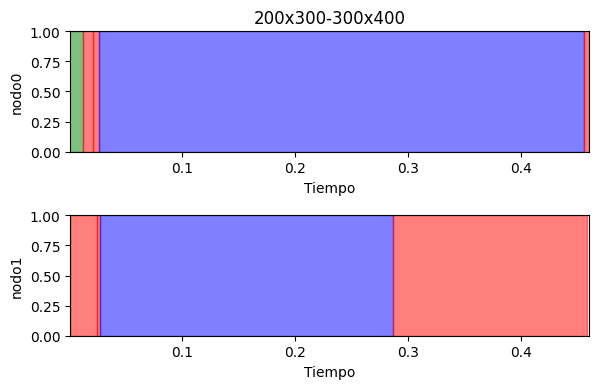

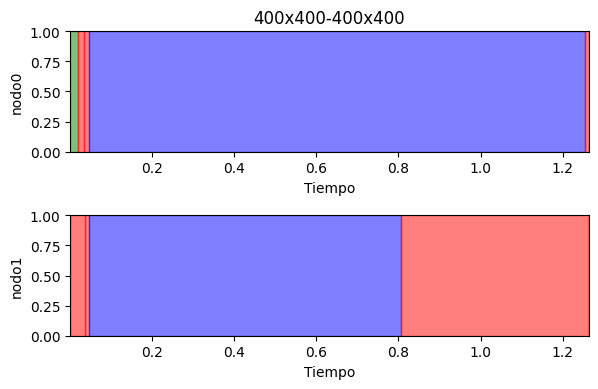

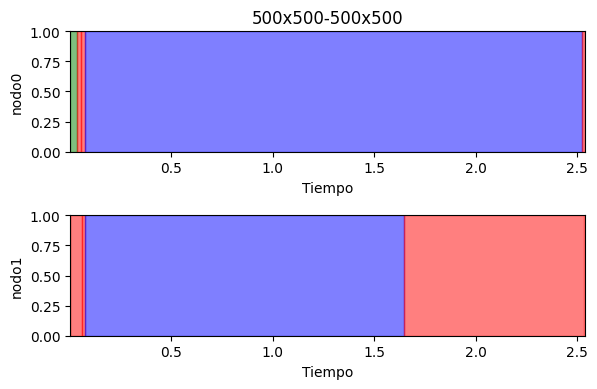

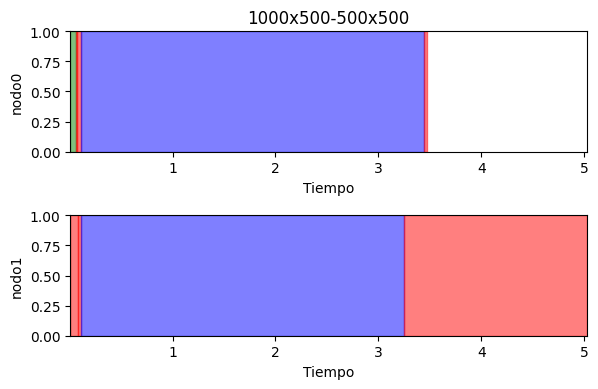

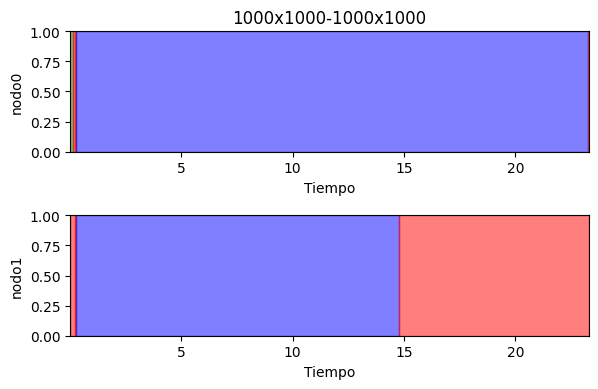

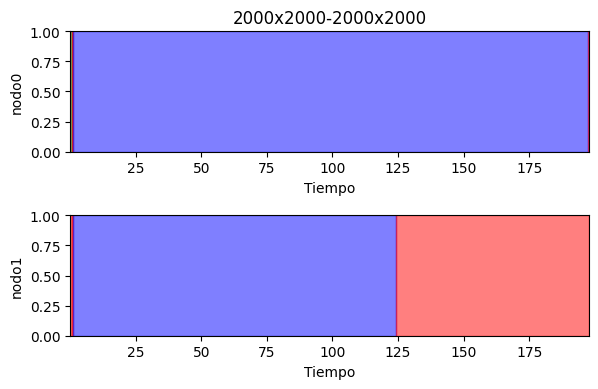

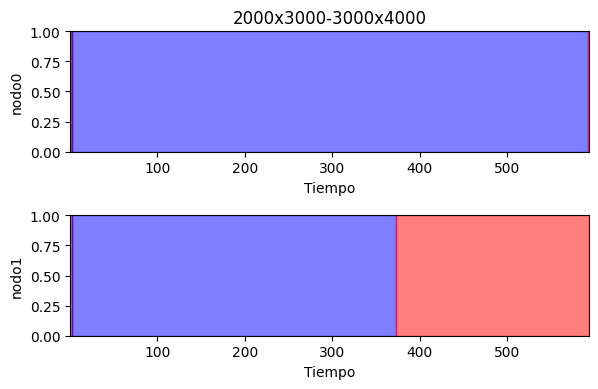

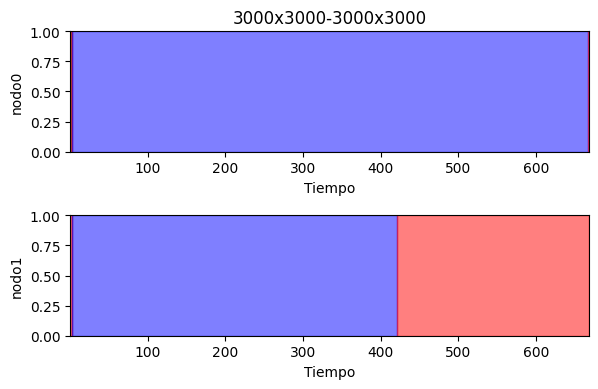

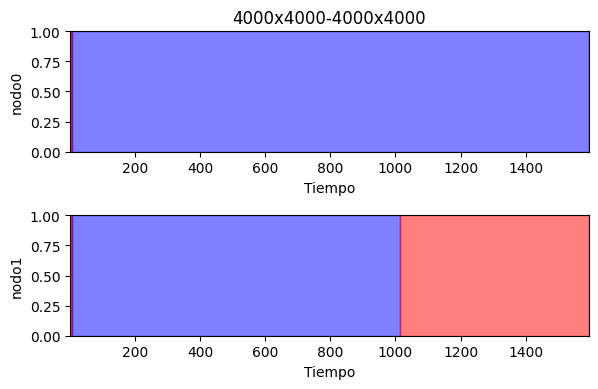

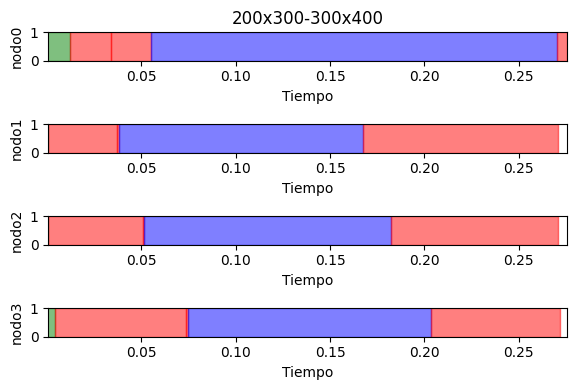

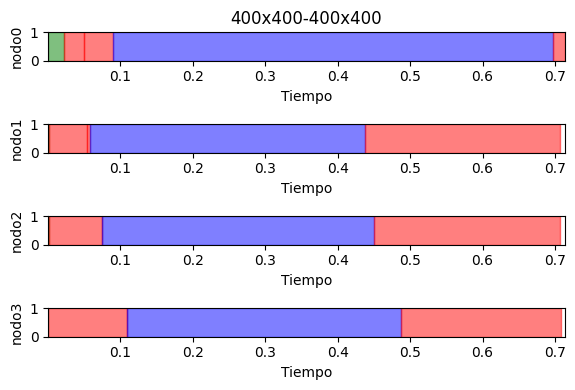

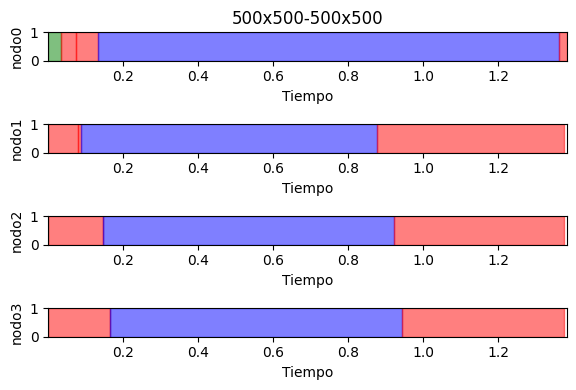

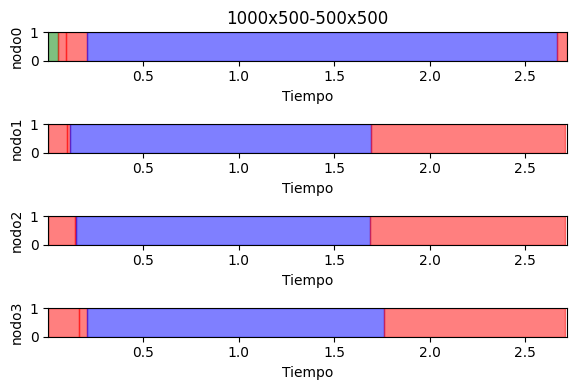

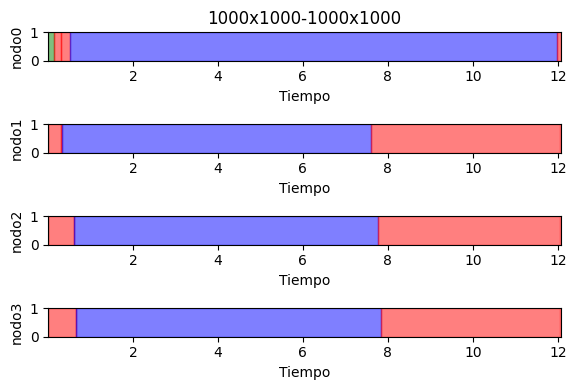

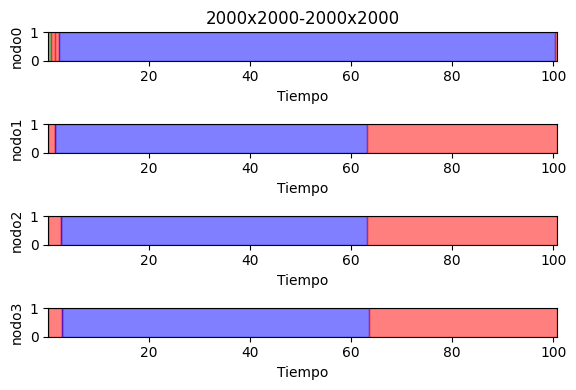

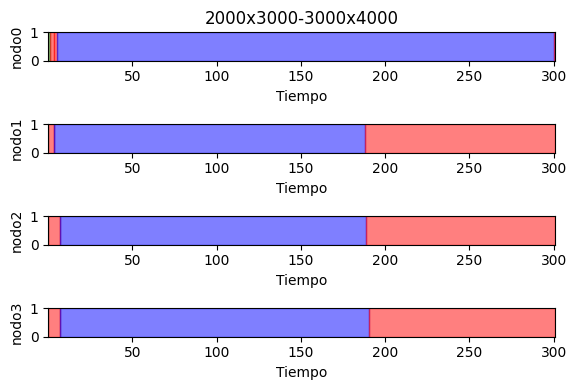

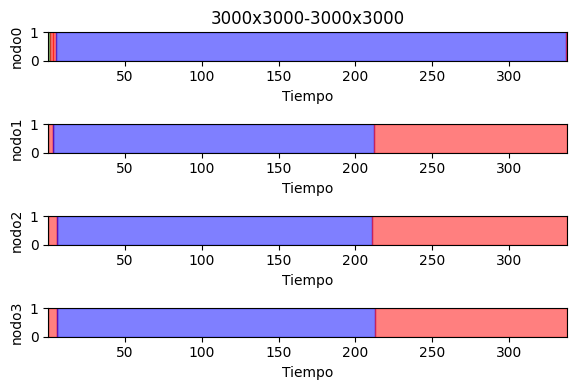

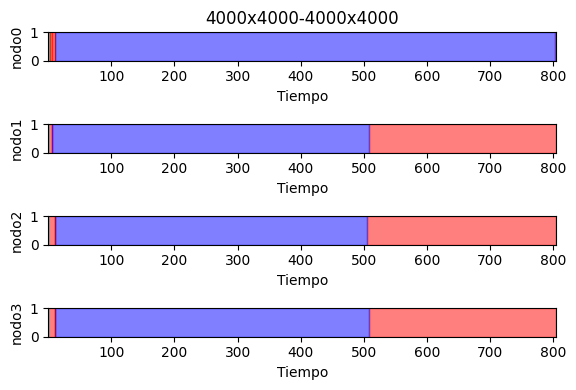

C:\Users\54261\AppData\Local\Temp\ipykernel_22956\1753613843.py:50: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


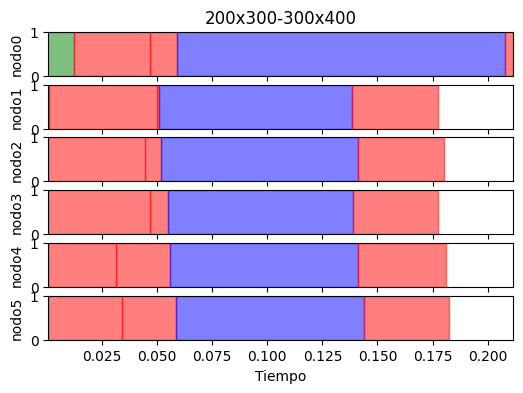

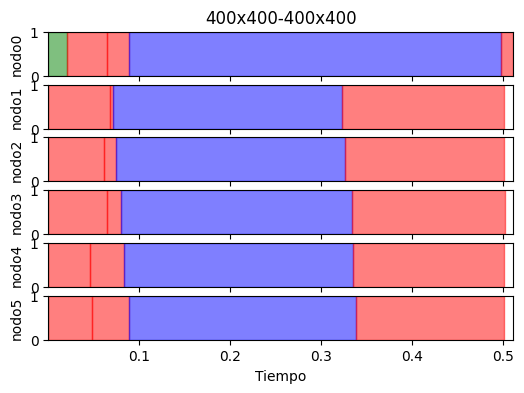

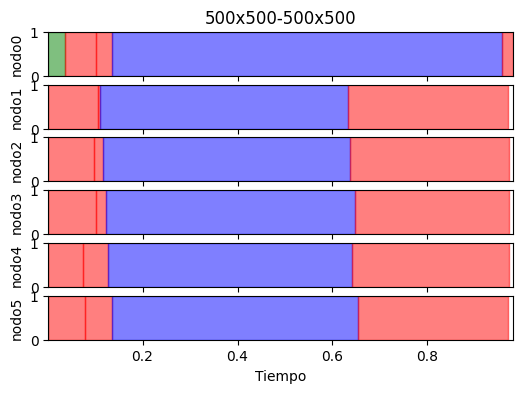

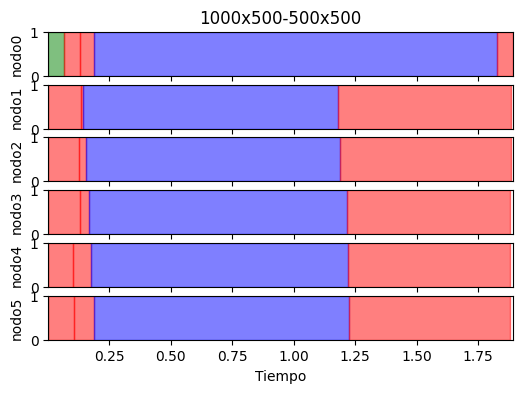

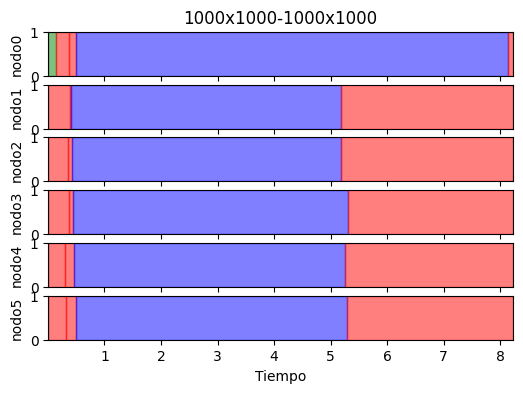

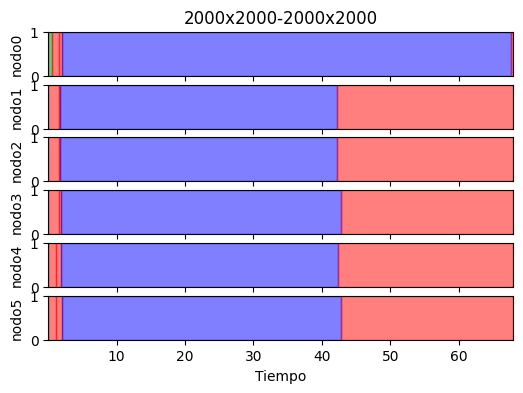

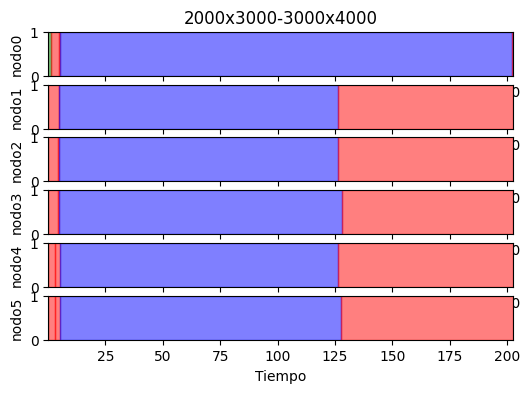

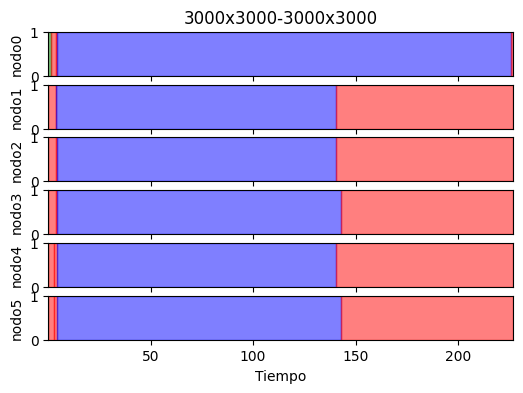

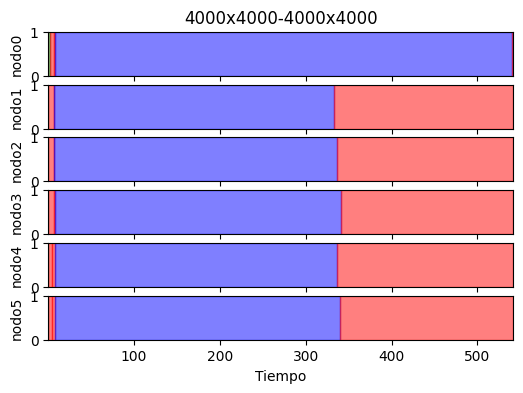

In [35]:
import matplotlib.pyplot as plt

for z in range(0, 27):
    # Datos de ejemplo
    tiempo_max = df_casos[z][14].max()
    tiempos = np.concatenate(
        [
            df_casos[z][6],
            df_casos[z][7],
            df_casos[z][8],
            df_casos[z][9],
            df_casos[z][10],
            df_casos[z][11],
            df_casos[z][12],
            df_casos[z][13],
            df_casos[z][14],
        ]
    )
    tiempos.sort()

    # Crear figura y subplots
    fig, axs = plt.subplots(nrows=df_casos[z][0].count(), ncols=1, figsize=(6, 4))

    # Configurar ejes y etiquetas para cada subplot
    for i, ax in enumerate(axs):
        if(i==0):
            ax.set_title(f'{df_casos[z][1].iloc[i]}x{df_casos[z][2].iloc[i]}-{df_casos[z][3].iloc[i]}x{df_casos[z][4].iloc[i]}')
        ax.set_xlim([min(tiempos), max(tiempos)])
        ax.set_xlabel("Tiempo")
        ax.set_ylabel(df_casos[z]["nodo"].iloc[i])
        # ax.set_title(f'Balanceo de carga - {df_casos[z]["nodo"].iloc[i]}')

        # # Dibujar línea horizontal para el procesamiento de datos
        # ax.hlines(y=4, xmin=min(tiempos), xmax=max(tiempos), color='b', linestyle='solid')

        # Dibujar línea vertical para cada momento de envío de datos
        ax.axvspan(df_casos[z][5].iloc[i], df_casos[z][6].iloc[i], color="g", alpha=0.5)
        ax.axvspan(df_casos[z][7].iloc[i], df_casos[z][8].iloc[i], color="r", alpha=0.5)
        ax.axvspan(
            df_casos[z][9].iloc[i], df_casos[z][10].iloc[i], color="r", alpha=0.5
        )
        ax.axvspan(
            df_casos[z][11].iloc[i], df_casos[z][12].iloc[i], color="b", alpha=0.5
        )
        ax.axvspan(
            df_casos[z][13].iloc[i], df_casos[z][14].iloc[i], color="r", alpha=0.5
        )

    # Mostrar gráfico
    fig.tight_layout()
    

    plt.show()
    # Guardar figura en archivo PNG
    fig.savefig(f'../outputs/plot_{df_casos[z][0].count()}_nodos_{df_casos[z][1].iloc[i]}x{df_casos[z][2].iloc[i]}-{df_casos[z][3].iloc[i]}x{df_casos[z][4].iloc[i]}.png')